# Kernel Density Estimation

Before running the code, you should install the `sklearn` package. Type in a code cell in the notebook:
```
!pip install sklearn
```

In [12]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from scipy.stats import norm

In [14]:
%matplotlib inline

In [15]:
def kde_sklearn(x, x_grid, bandwidth=0.2, kernel='gaussian', **kwargs):
    """Kernel Density Estimation with Scikit-learn
    valid kernels are ['gaussian'|'tophat'|'epanechnikov'|'exponential'|'linear'|'cosine']
    the default kernel is 'gaussian'"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [16]:
def silverman_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [17]:
def scott_rule(x):
    # interquartile range
    iqr = np.percentile(x,75) - np.percentile(x,25)
    # optimal bandwidth
    h = 1.059 * min(np.std(x), iqr/1.34) * len(x)**(-0.2)
    return h

In [18]:
n_observations = 1000
x = np.random.randn(n_observations) + np.random.choice([0,3],size=n_observations,p=[.6,.4])

(array([ 14.,  62., 172., 193., 152., 114., 156.,  96.,  31.,  10.]),
 array([-2.87233721, -1.97579595, -1.07925469, -0.18271343,  0.71382784,
         1.6103691 ,  2.50691036,  3.40345163,  4.29999289,  5.19653415,
         6.09307541]),
 <a list of 10 Patch objects>)

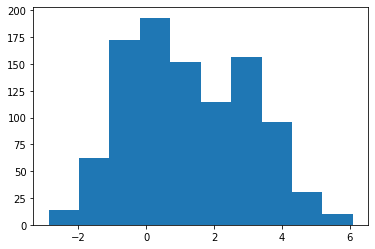

In [19]:
plt.hist(x)

In [20]:
x_grid = np.linspace(-1,4,1000)

In [21]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x))

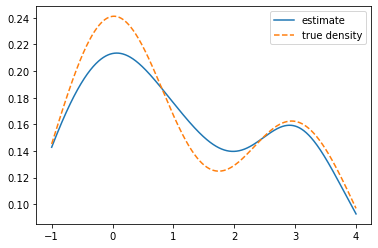

In [22]:
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

In [23]:
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x), kernel='epanechnikov')

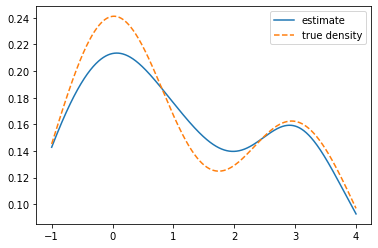

In [24]:
plt.plot(x_grid, pdf, label='estimate')
plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

## Exercise 1

Generate 10000 random numbers for a random variable $X = Y + Z$ where $Y$ in uniform on $[0,1]$ and $Z$ takes the value 0 with probability $0.7$ and the value 0.5 with probability $0.3$. 
 1. Plot a histogram of the empirical distribution of $X$.
 2. Construct a kernel density estimator for $X$.
 3. Compute the empirical cdf for $X$. (Hint computing the empirical cdf is implemented in the function `ECDF` in `statsmodels.distributions.empirical_distribution`.)

[0.20841635 0.32449941 0.11345278 ... 0.32820021 0.2991229  0.23549837]
[0.  0.  0.  ... 0.  0.5 0. ]
[0.20841635 0.32449941 0.11345278 ... 0.32820021 0.7991229  0.23549837]


(array([1049., 1039., 1017., 1383., 1510., 1504., 1146.,  463.,  446.,
         443.]),
 array([2.38369805e-04, 1.50206367e-01, 3.00174364e-01, 4.50142360e-01,
        6.00110357e-01, 7.50078354e-01, 9.00046351e-01, 1.05001435e+00,
        1.19998234e+00, 1.34995034e+00, 1.49991834e+00]),
 <a list of 10 Patch objects>)

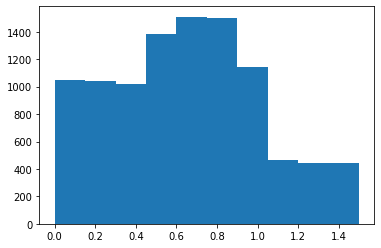

In [25]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import random

n=10000
count=0
y=np.random.uniform(size=n)
z=np.random.choice([0,0.5],size=n,p=[.7,.3])
x=np.add(y,z)

print (y)
print (z)
print(x)

plt.hist(x)



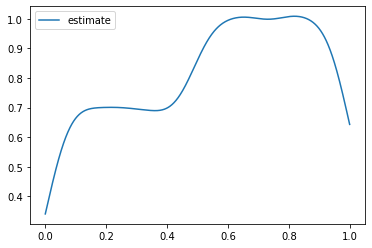

In [26]:
x_grid = np.linspace(0,1,1000)
pdf = kde_sklearn(x, x_grid, bandwidth=scott_rule(x))
plt.plot(x_grid, pdf, label='estimate')
#plt.plot(x_grid, .6*norm.pdf(x_grid) + .4 *norm.pdf(x_grid-3), label='true density',linestyle='--')
plt.legend()

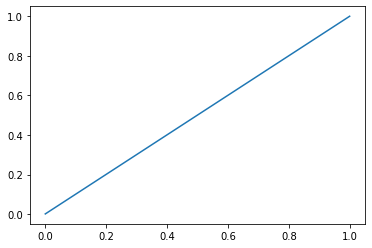

In [40]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(x_grid)
plt.plot(x_grid, ecdf(x_grid), label='cdf')
#print (ecdf ([0,0.5,1]))

## Exercise 2

Generate random bids from a first-price auction with 2 bidders. Assume that bidders are symmetric and their valuations $V_i$ are drawn from a uniform distribution on $[0,1]$ for $i=1,2$.
1. Plot a histogram of the bid distribution.
2. Use the Guerre-Perrigne-Vuong estimator to estimate the distribution of pseudo-valuations from the distribution of bids. Plot a histogram of the distribution of pseudo-valuations.
3. Construct a kernel density estimator for the distribution of pseudo-valuations. Also compute the empirical cdf.